# Module 4: Feature Engineering

## Objectives

1. Detect any hospital that may abuse the resources.
2. Detect any hospital that may abuse the resources compared to its peers.
3. Detect any hospital that may abuse the resources compared to the average (median etc) of its peers.
4. Detect any hospital that may abuse the resources compared to the average (median etc) of its peers of the same DRG and State.

# Section 1: Data Preparation

## Section 1.1: Load Data

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [138]:
data = pd.read_csv('inpatientCharges.csv')

In [139]:
#data.describe()
#data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [140]:
data.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
data = data.drop('Average_Covered_Charges',axis=1)

In [141]:
data.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$5658.33,$4851.44


In [142]:
# Distribution plots of average total payments 
data['Average_Total_Payments'].describe()

count       163065
unique      147842
top       $4370.00
freq             9
Name: Average_Total_Payments, dtype: object

In [143]:
# Change data type and transfer spending amount with dollar sign into numeric
data['DRG'] = data['DRG'].astype('category')
data['Provider_State'] = data['Provider_State'].astype('category')
data['Provider_City'] = data['Provider_City'].astype('category')
data['Provider_Id'] = data['Provider_Id'].astype('category')
data['Average_Total_Payments'] = (data['Average_Total_Payments']
                              .str.replace(r'[^-+\d.]', '').astype(float))
data['Average_Medicare_Payment'] = (data['Average_Medicare_Payment']
                              .str.replace(r'[^-+\d.]', '').astype(float))

/var/folders/4_/810dy4d13s9c2627491y7jdh0000gn/T/ipykernel_4597/2932651901.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Average_Total_Payments'] = (data['Average_Total_Payments']
/var/folders/4_/810dy4d13s9c2627491y7jdh0000gn/T/ipykernel_4597/2932651901.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Average_Medicare_Payment'] = (data['Average_Medicare_Payment']


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DRG                            163065 non-null  category
 1   Provider_Id                    163065 non-null  category
 2   Provider_Name                  163065 non-null  object  
 3   Provider_StreetAddress         163065 non-null  object  
 4   Provider_City                  163065 non-null  category
 5   Provider_State                 163065 non-null  category
 6   Provider_Zipcode               163065 non-null  int64   
 7   Hospital_referral_region_desp  163065 non-null  object  
 8   Total_Discharges               163065 non-null  int64   
 9   Average_Total_Payments         163065 non-null  float64 
 10  Average_Medicare_Payment       163065 non-null  float64 
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 9.9+ MB


# Section 2: EDA

## Section 2.1: Average Total Payments Distribution plots

<AxesSubplot:xlabel='Average_Total_Payments', ylabel='Count'>

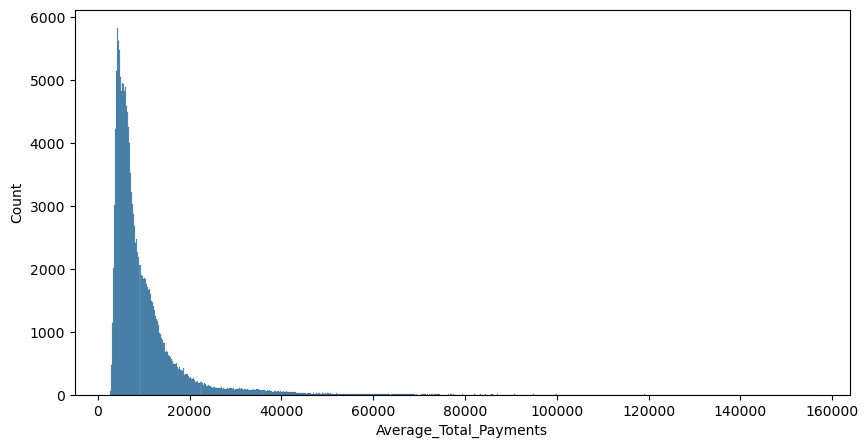

In [145]:
# Distribution plots of average total payments 
data['Average_Total_Payments'].describe()

plt.figure(figsize=(10,5)) # Plot a graph with reasonable size.
sns.histplot(data['Average_Total_Payments'])
# plt.plot(data['Average_Total_Payments'])

<AxesSubplot:xlabel='Average_Total_Payments'>

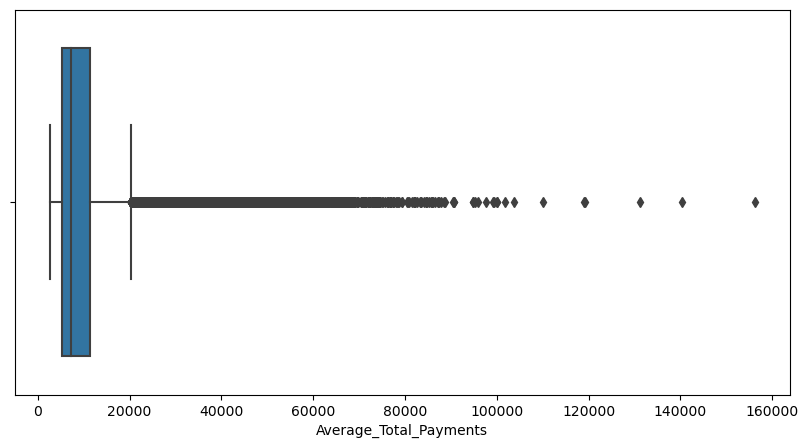

In [146]:
plt.figure(figsize=(10,5)) # Plot a graph with reasonable size.
#sns.histplot(data['Average_Total_Payments'])
# plt.plot(data['Average_Total_Payments'])
sns.boxplot(x = 'Average_Total_Payments', data = data) 

## Section 2.2: Count by State

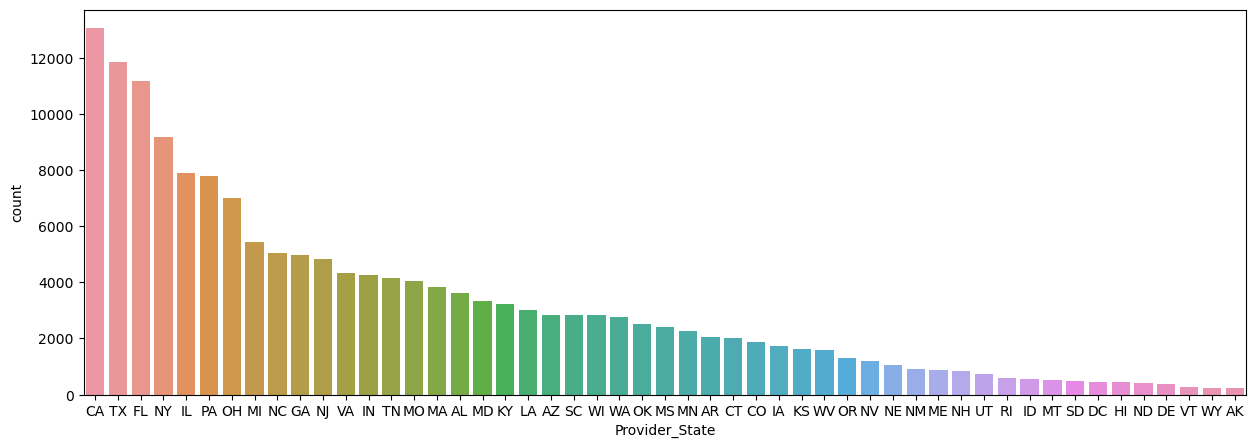

In [147]:
# data['Provider_State'].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(x='Provider_State',data=data,order=data['Provider_State'].value_counts().index)
#plt.xticks(rotation = 90)
#ax = plt.gca()
#for p in ax.patches:
#    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#            fontsize=12, color='blue', ha='center', va='bottom')
plt.rcParams["axes.labelsize"] = 20

## Section 2.3: Count of top 20 cities

In [148]:
data['Provider_Name'].value_counts()

GOOD SAMARITAN HOSPITAL                  633
ST JOSEPH MEDICAL CENTER                 427
MERCY MEDICAL CENTER                     357
MERCY HOSPITAL                           347
ST JOSEPH HOSPITAL                       343
                                        ... 
J PAUL JONES HOSPITAL                      1
GREATER BATON ROUGE SURGICAL HOSPITAL      1
FAIRWAY MEDICAL CENTER                     1
MONROE SURGICAL HOSPITAL                   1
EAGLEVILLE HOSPITAL                        1
Name: Provider_Name, Length: 3201, dtype: int64

count      163065
unique       1977
top       CHICAGO
freq         1505
Name: Provider_City, dtype: object


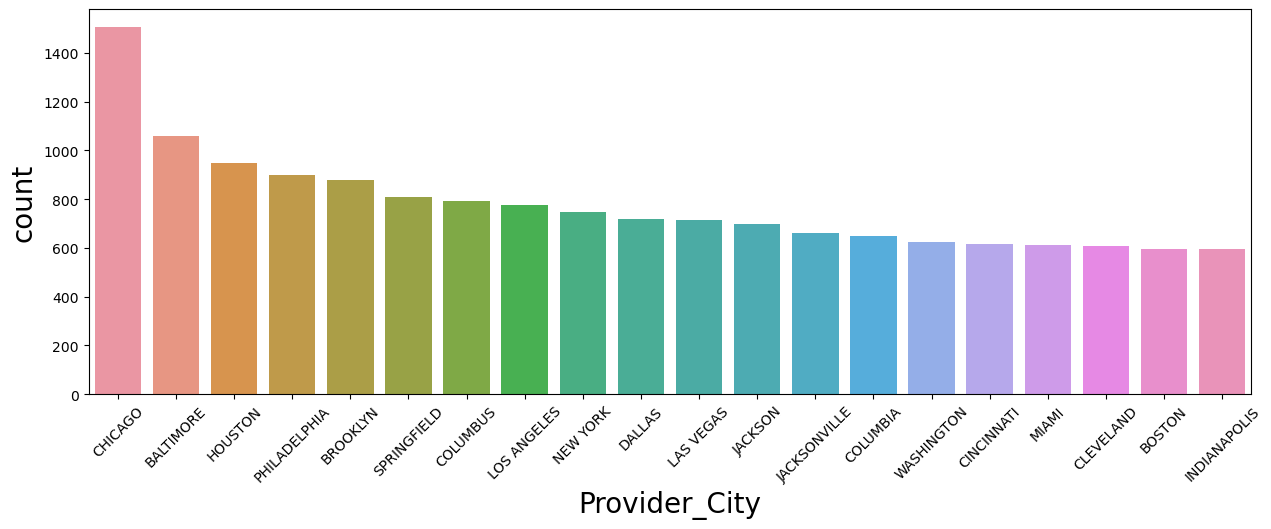

In [149]:
print(data['Provider_City'].describe())

# This will look better
plt.figure(figsize=(15,5))
txt = data['Provider_City'].value_counts()[:20].index

chart = sns.countplot(
    x='Provider_City' ,data=data , order=txt
)

_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.rcParams["axes.labelsize"] = 10

## Section 2.4: Average Medicare Payments

<AxesSubplot:xlabel='Average_Medicare_Payment', ylabel='Count'>

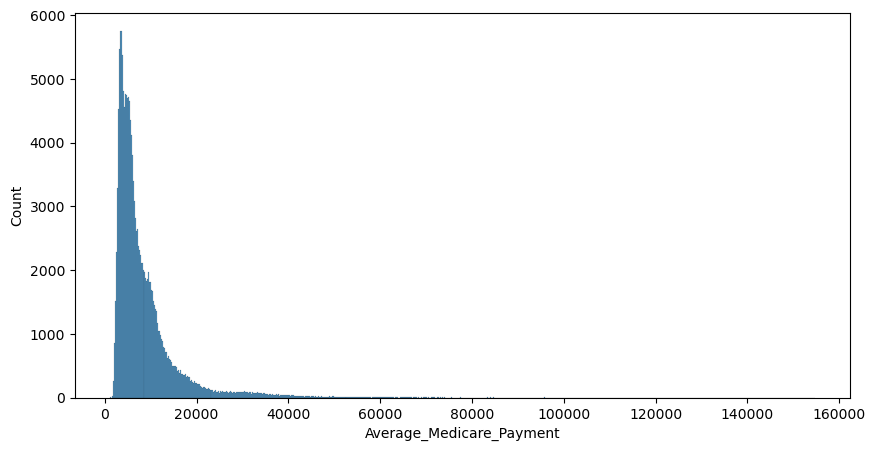

In [150]:
# Distribution plots of average total payments 
data['Average_Medicare_Payment'].describe()

plt.figure(figsize=(10,5)) # Plot a graph with reasonable size.
sns.histplot(data['Average_Medicare_Payment'])
# plt.plot(data['Average_Total_Payments'])

<AxesSubplot:xlabel='Average_Medicare_Payment'>

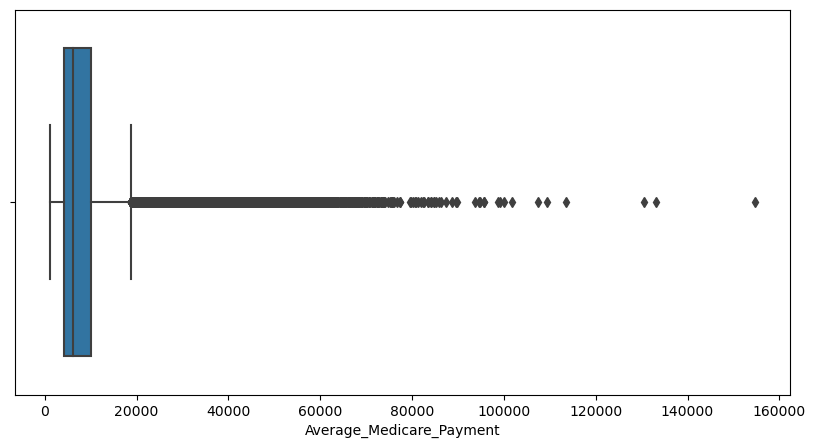

In [151]:
plt.figure(figsize=(10,5)) # Plot a graph with reasonable size.
#sns.histplot(data['Average_Total_Payments'])
# plt.plot(data['Average_Total_Payments'])
sns.boxplot(x = 'Average_Medicare_Payment', data = data) 

# Section 3: Feature Engineering

## Section 3.1: benchmark table - State & DRG average

Since we are detecting any hopistals that may abuse resources compared to the AVG/Median of the same DRG and State.
Let's first set up the benchmark on AVG and Median by ST and DRG 

In [152]:
# AVG
benchmark_avg = data.groupby(['Provider_State','DRG'])['Average_Total_Payments'].mean().reset_index()
benchmark_avg.columns = ['Provider_State','DRG','Avg_Payment_ByStateDRG']
benchmark_avg.head()

,Provider_State,DRG,Avg_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12555.548333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9275.867500


In [153]:
# Median
benchmark_median = data.groupby(['Provider_State','DRG'])['Average_Total_Payments'].median().reset_index()
benchmark_median.columns = ['Provider_State','DRG','Avg_Payment_ByStateDRG']
benchmark_median.head()

,Provider_State,DRG,Avg_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12437.045
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9320.250


## Section 3.1.1 Focus on "Average Medicare Payments"

1. We are trying to find out anamolies by focusing on "Average Medicare Payments", so let's create benchmark on this variable;
2. Since AVG is easily affected by outliers, Median would be a better measurement to clearly centralize tendency than Mean;
3. Check out median and mean by ST and DRG before creating features

#### Overall Mean

In [154]:
# Mean
benchmark_overall_avg = data[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].mean()
benchmark_overall_avg

Average_Total_Payments      9707.473804
Average_Medicare_Payment    8494.490964
Total_Discharges              42.776304
dtype: float64

#### Overall Median

In [155]:
#Median
benchmark_Overall_median = data[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].median()
benchmark_Overall_median

Average_Total_Payments      7214.10
Average_Medicare_Payment    6158.46
Total_Discharges              27.00
dtype: float64

In [183]:
data

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44
...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,3806.86,3071.39
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,4027.36,2649.72
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,5704.36,4058.36
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,7663.09,6848.54


#### Median by State

In [221]:
#Median
benchmark_by_State = data.groupby(['Provider_State'])[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].median().reset_index()
benchmark_by_State.columns = ['Provider_State','Median_Average_Total_Payments','Median_Average_Medicare_Payment','Median_Average_Total_Discharges']
benchmark_by_State.head()

,Provider_State,Median_Average_Total_Payments,Median_Average_Medicare_Payment,Median_Average_Total_Discharges
0,AK,11190.08,9594.930,20.0
1,AL,5876.37,4811.250,25.0
2,AR,6151.68,5165.300,27.0
3,AZ,7671.36,6471.110,25.0
4,CA,9378.01,8380.895,24.0


#### Median by State&DRG

In [222]:
benchmark_by_StateDRG = data.groupby(['Provider_State','DRG'])[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].median().reset_index()
benchmark_by_StateDRG.columns = ['Provider_State','DRG','Median_Average_Total_Payments','Median_Medicare_Payment','Median_Total_Discharges']
benchmark_by_StateDRG.head()

,Provider_State,DRG,Median_Average_Total_Payments,Median_Medicare_Payment,Median_Total_Discharges
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950,6413.780,23.0
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000,8081.540,11.0
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010,20555.255,22.5
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12437.045,10495.340,17.5
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9320.250,8372.925,18.0


## Section 3.2: Create Features and merge to dataset

## Section 3.2.1: The ratio to bechmark by 'Provider_ID'

### Feature 1-3: Compare total payments, medicare payments by "Provider_ID" in same state and DRG

In [232]:
'''
df = pd.DataFrame()
df = df.append([benchmark_overall_avg]*data.shape[0],ignore_index=True)
df

Feature123 = pd.DataFrame()
Feature123['Avg_Total_Pymts_by_id_mean_Ratio'] = data['Average_Total_Payments']/df['Average_Total_Payments']
Feature123['Avg_Medicare_Pymts_by_id_mean_Ratio'] = data['Average_Medicare_Payment']/df['Average_Medicare_Payment']
Feature123['Avg_Total_Discharges_by_id_mean_Ratio'] = data['Total_Discharges']/df['Total_Discharges']

Feature123

'''
Feature123 = pd.DataFrame()
Feature123['Avg_Total_Pymts_by_id_mean_Ratio'] = data['Average_Total_Payments']/benchmark_overall_avg['Average_Total_Payments']
Feature123['Avg_Medicare_Pymts_by_id_mean_Ratio'] = data['Average_Medicare_Payment']/benchmark_overall_avg['Average_Medicare_Payment']
Feature123['Avg_Total_Discharges_by_id_mean_Ratio'] = data['Total_Discharges']/benchmark_overall_avg['Total_Discharges']

Feature123


,Avg_Total_Pymts_by_id_mean_Ratio,Avg_Medicare_Pymts_by_id_mean_Ratio,Avg_Total_Discharges_by_id_mean_Ratio
0,0.595133,0.560802,2.127346
1,0.596197,0.585875,0.327284
2,0.559873,0.524315,0.561058
3,0.558081,0.486099,0.584436
4,0.582884,0.571128,0.420794
...,...,...,...
163060,0.392158,0.361574,0.537681
163061,0.414872,0.311934,0.257152
163062,0.587626,0.477764,0.444171
163063,0.789401,0.806233,0.257152


In [233]:
# Create an empty dataframe to collect the features
Features = pd.DataFrame()
Features[['Provider_Id']] = data[['Provider_Id']]


# add the new feature average spending to the dataset 
Features =  [Features,Feature123]
Features = pd.concat(Features,axis=1)
Features.head()

,Provider_Id,Avg_Total_Pymts_by_id_mean_Ratio,Avg_Medicare_Pymts_by_id_mean_Ratio,Avg_Total_Discharges_by_id_mean_Ratio
0,10001,0.595133,0.560802,2.127346
1,10005,0.596197,0.585875,0.327284
2,10006,0.559873,0.524315,0.561058
3,10011,0.558081,0.486099,0.584436
4,10016,0.582884,0.571128,0.420794


##### Thought Process:
Compare the benchmark of 'avg total payments', 'avg medicare payments' and 'avg total discharges' on each ID itself to bechmark overall mean, can tell us which hopsital are too much over the average, therefore could be good feature for predicting anomalies

## Section 3.2.2: The ratio to bechmark in 'Overall' level

### Feature 4-6: The ratio of total payments, medicare payments, total discharges to 'overall median' bechmark

In [234]:
Features = pd.DataFrame()
Features[['ID','ST','DRG']] = data[['Provider_Id','Provider_State','DRG']]


# add the new feature average spending to the dataset 
Features =  [Features,Feature123]
Features = pd.concat(Features,axis=1)
Features.head()

,ID,ST,DRG,Avg_Total_Pymts_by_id_mean_Ratio,Avg_Medicare_Pymts_by_id_mean_Ratio,Avg_Total_Discharges_by_id_mean_Ratio
0,10001,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.595133,0.560802,2.127346
1,10005,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.596197,0.585875,0.327284
2,10006,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.559873,0.524315,0.561058
3,10011,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.558081,0.486099,0.584436
4,10016,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.582884,0.571128,0.420794


In [238]:
'''
Avg_Total_Pymts_overall_median_Ratio = Feature456['Average_Total_Payments']/Feature456['Median_Average_Total_Payments']
Avg_Medicare_Pymts_overall_median_Ratio = Feature456['Average_Medicare_Payment']/Feature456['Median_Average_Medicare_Payment']
Avg_Total_Discharges_overall_median_Ratio = Feature456['Total_Discharges']/Feature456['Median_Average_Total_Discharges']

Features['Avg_Total_Pymts_overall_median_Ratio'] = Avg_Total_Pymts_overall_median_Ratio
Features['Avg_Medicare_Pymts_overall_median_Ratio'] = Avg_Medicare_Pymts_overall_median_Ratio
Features['Avg_Total_Discharges_overall_median_Ratio'] = Avg_Total_Discharges_overall_median_Ratio
Feature456.tail()


Feature456 = pd.DataFrame()
Feature456['Avg_Total_Pymts_Ratio'] = data['Average_Total_Payments']/df['Median_Average_Total_Payments']
Feature456['Avg_Medicare_Pymt_Ratio'] = data['Average_Medicare_Payment']/df['Median_Average_Total_Payments']
Feature456['Avg_Total_Discharges_Ratio'] = data['Total_Discharges']/df['Median_Average_Total_Payments']

Feature456.head()




'''
#Feature456 = pd.DataFrame()
Feature456['Avg_Total_Pymts_overall_median_Ratio'] = data['Average_Total_Payments']/benchmark_Overall_median['Average_Total_Payments']
Feature456['Avg_Medicare_Pymts_overall_median_Ratio'] = data['Average_Medicare_Payment']/benchmark_Overall_median['Average_Medicare_Payment']
Feature456['Avg_Total_Discharges_overall_median_Ratio'] = data['Total_Discharges']/benchmark_Overall_median['Total_Discharges']

Feature456




,Avg_Total_Pymts_overall_median_Ratio,Avg_Medicare_Pymts_overall_median_Ratio,Avg_Total_Discharges_overall_median_Ratio
0,0.800826,0.773526,3.370370
1,0.802258,0.808109,0.518519
2,0.753379,0.723199,0.888889
3,0.750968,0.670486,0.925926
4,0.784343,0.787768,0.666667
...,...,...,...
163060,0.527697,0.498727,0.851852
163061,0.558262,0.430257,0.407407
163062,0.790724,0.658989,0.703704
163063,1.062238,1.112054,0.407407


In [239]:
'''
Average_Total_Payments_byST = F456['Average_Total_Payments']/F456['Median_Average_Total_Payments']
Medicare_Payment_byST = F456['Average_Medicare_Payment']/F456['Median_Medicare_Payment']
Total_Discharges_byST = F456['Total_Discharges']/F456['Median_Total_Discharges']

Features['Avg_Total_Pymt_byST'] = Average_Total_Payments_byST
Features['Medicare_Pymt_byST'] = Average_Total_Payments_byST
Features['Total_Discharges_byST'] = Total_Discharges_byST
Features.tail()
'''

Features[['Provider_Id']] = data[['Provider_Id']]
Features['Avg_Total_Pymts_overall_median_Ratio'] = Feature456['Avg_Total_Pymts_overall_median_Ratio'] 
Features['Avg_Medicare_Pymts_overall_median_Ratio'] = Feature456['Avg_Medicare_Pymts_overall_median_Ratio'] 
Features['Avg_Total_Discharges_overall_median_Ratio'] = Feature456['Avg_Total_Discharges_overall_median_Ratio']
Features.tail()


,ID,ST,DRG,Avg_Total_Pymts_by_id_mean_Ratio,Avg_Medicare_Pymts_by_id_mean_Ratio,Avg_Total_Discharges_by_id_mean_Ratio,Provider_Id,Avg_Total_Pymts_overall_median_Ratio,Avg_Medicare_Pymts_overall_median_Ratio,Avg_Total_Discharges_overall_median_Ratio
163060,670041,TX,948 - SIGNS & SYMPTOMS W/O MCC,0.392158,0.361574,0.537681,670041,0.527697,0.498727,0.851852
163061,670055,TX,948 - SIGNS & SYMPTOMS W/O MCC,0.414872,0.311934,0.257152,670055,0.558262,0.430257,0.407407
163062,670056,TX,948 - SIGNS & SYMPTOMS W/O MCC,0.587626,0.477764,0.444171,670056,0.790724,0.658989,0.703704
163063,670060,TX,948 - SIGNS & SYMPTOMS W/O MCC,0.789401,0.806233,0.257152,670060,1.062238,1.112054,0.407407
163064,670068,TX,948 - SIGNS & SYMPTOMS W/O MCC,0.364642,0.339916,0.280529,670068,0.490671,0.468853,0.444444


##### Thought process:
From these 3 features, we compare the 'avg total amounts','avg medicare amounts', 'total discharges' to median benchmark in overall level, we can recognize how much higher and lower the spending amount of the individual hospital to the overall level median amount

## Section 3.2.3: The ratio to bechmark in "State" level

### Feature 7-9: The ratio of total payments, medicare payments, total discharges to 'State level median' bechmark

In [241]:
# add the new feature average spending to the dataset 
Feature789 = pd.merge(data, benchmark_by_State, how='left', on='Provider_State')
#F789.head()

#Feature789 = pd.DataFrame()
Feature789['Avg_Total_Pymts_overall_median_Ratio_byST'] = data['Average_Total_Payments']/benchmark_by_State['Median_Average_Total_Payments']
Feature789['Avg_Medicare_Pymts_overall_median_Ratio_byST'] = data['Average_Medicare_Payment']/benchmark_by_State['Median_Average_Medicare_Payment']
Feature789['Avg_Total_Discharges_overall_median_Ratio_byST'] = data['Total_Discharges']/benchmark_by_State['Median_Average_Total_Discharges']

Feature789.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Median_Average_Total_Payments,Median_Average_Medicare_Payment,Median_Average_Total_Discharges,Avg_Total_Pymts_overall_median_Ratio_byST,Avg_Medicare_Pymts_overall_median_Ratio_byST,Avg_Total_Discharges_overall_median_Ratio_byST
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,5876.37,4811.25,25.0,0.516282,0.496484,4.550000
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71,5876.37,4811.25,25.0,0.984889,1.034390,0.560000
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79,5876.37,4811.25,25.0,0.883490,0.862252,0.888889
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16,5876.37,4811.25,25.0,0.706206,0.638091,1.000000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44,5876.37,4811.25,25.0,0.603361,0.578869,0.750000


In [242]:
Features['Avg_Total_Pymts_overall_median_Ratio_byST'] = Feature789['Avg_Total_Pymts_overall_median_Ratio_byST'] 
Features['Avg_Medicare_Pymts_overall_median_Ratio_byST'] = Feature789['Avg_Medicare_Pymts_overall_median_Ratio_byST'] 
Features['Avg_Total_Discharges_overall_median_Ratio_byST'] = Feature789['Avg_Total_Discharges_overall_median_Ratio_byST']

Features.head()

,ID,ST,DRG,Avg_Total_Pymts_by_id_mean_Ratio,Avg_Medicare_Pymts_by_id_mean_Ratio,Avg_Total_Discharges_by_id_mean_Ratio,Provider_Id,Avg_Total_Pymts_overall_median_Ratio,Avg_Medicare_Pymts_overall_median_Ratio,Avg_Total_Discharges_overall_median_Ratio,Avg_Total_Pymts_overall_median_Ratio_byST,Avg_Medicare_Pymts_overall_median_Ratio_byST,Avg_Total_Discharges_overall_median_Ratio_byST
0,10001,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.595133,0.560802,2.127346,10001,0.800826,0.773526,3.370370,0.516282,0.496484,4.550000
1,10005,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.596197,0.585875,0.327284,10005,0.802258,0.808109,0.518519,0.984889,1.034390,0.560000
2,10006,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.559873,0.524315,0.561058,10006,0.753379,0.723199,0.888889,0.883490,0.862252,0.888889
3,10011,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.558081,0.486099,0.584436,10011,0.750968,0.670486,0.925926,0.706206,0.638091,1.000000
4,10016,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.582884,0.571128,0.420794,10016,0.784343,0.787768,0.666667,0.603361,0.578869,0.750000


##### Thought process:
From these 3 features, we compare the 'avg total amounts','avg medicare amounts', 'total discharges' to median benchmark in State level, we can recognize how much higher and lower the spending amount of the individual hospital to the state level median amount

## Section 3.2.3: The ratio to benchmark in "State" and "DRG" level

### Feature 10-12: The ratio of total payments, medicare payments, total discharges to 'State&DRG level median' bechmark

In [244]:
# add the new feature average spending to the dataset 
Feature101112 = pd.merge(data, benchmark_by_StateDRG, how='left', on=['Provider_State', 'DRG'])
#F789.head()

#Feature789 = pd.DataFrame()
Feature101112['Avg_Total_Pymts_overall_median_Ratio_byST_DRG'] = data['Average_Total_Payments']/benchmark_by_StateDRG['Median_Average_Total_Payments']
Feature101112['Avg_Medicare_Pymts_overall_median_Ratio_byST_DRG'] = data['Average_Medicare_Payment']/benchmark_by_StateDRG['Median_Medicare_Payment']
Feature101112['Avg_Total_Discharges_overall_median_Ratio_byST_DRG'] = data['Total_Discharges']/benchmark_by_StateDRG['Median_Total_Discharges']

Feature101112.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Median_Average_Total_Payments,Median_Medicare_Payment,Median_Total_Discharges,Avg_Total_Pymts_overall_median_Ratio_byST_DRG,Avg_Medicare_Pymts_overall_median_Ratio_byST_DRG,Avg_Total_Discharges_overall_median_Ratio_byST_DRG
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,5658.33,4471.68,29.0,0.687607,0.742734,3.956522
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71,5658.33,4471.68,29.0,0.657753,0.615812,1.272727
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79,5658.33,4471.68,29.0,0.251525,0.216674,1.066667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16,5658.33,4471.68,29.0,0.435599,0.393428,1.428571
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44,5658.33,4471.68,29.0,0.607101,0.579420,1.000000


In [245]:
Features['Avg_Total_Pymts_overall_median_Ratio_byST_DRG'] = Feature101112['Avg_Total_Pymts_overall_median_Ratio_byST_DRG'] 
Features['Avg_Medicare_Pymts_overall_median_Ratio_byST_DRG'] = Feature101112['Avg_Medicare_Pymts_overall_median_Ratio_byST_DRG'] 
Features['Avg_Total_Discharges_overall_median_Ratio_byST_DRG'] = Feature101112['Avg_Total_Discharges_overall_median_Ratio_byST_DRG']

Features.head()

,ID,ST,DRG,Avg_Total_Pymts_by_id_mean_Ratio,Avg_Medicare_Pymts_by_id_mean_Ratio,Avg_Total_Discharges_by_id_mean_Ratio,Provider_Id,Avg_Total_Pymts_overall_median_Ratio,Avg_Medicare_Pymts_overall_median_Ratio,Avg_Total_Discharges_overall_median_Ratio,Avg_Total_Pymts_overall_median_Ratio_byST,Avg_Medicare_Pymts_overall_median_Ratio_byST,Avg_Total_Discharges_overall_median_Ratio_byST,Avg_Total_Pymts_overall_median_Ratio_byST_DRG,Avg_Medicare_Pymts_overall_median_Ratio_byST_DRG,Avg_Total_Discharges_overall_median_Ratio_byST_DRG
0,10001,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.595133,0.560802,2.127346,10001,0.800826,0.773526,3.370370,0.516282,0.496484,4.550000,0.687607,0.742734,3.956522
1,10005,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.596197,0.585875,0.327284,10005,0.802258,0.808109,0.518519,0.984889,1.034390,0.560000,0.657753,0.615812,1.272727
2,10006,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.559873,0.524315,0.561058,10006,0.753379,0.723199,0.888889,0.883490,0.862252,0.888889,0.251525,0.216674,1.066667
3,10011,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.558081,0.486099,0.584436,10011,0.750968,0.670486,0.925926,0.706206,0.638091,1.000000,0.435599,0.393428,1.428571
4,10016,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.582884,0.571128,0.420794,10016,0.784343,0.787768,0.666667,0.603361,0.578869,0.750000,0.607101,0.579420,1.000000


##### Thought process:
From these 3 features, we compare the 'avg total amounts','avg medicare amounts', 'total discharges' to median benchmark in State and DRG level, we can recognize how much higher and lower the spending amount of the individual hospital to the state and DRG level median amount

### Section 3 Summary:

<AxesSubplot:xlabel='variable', ylabel='value'>

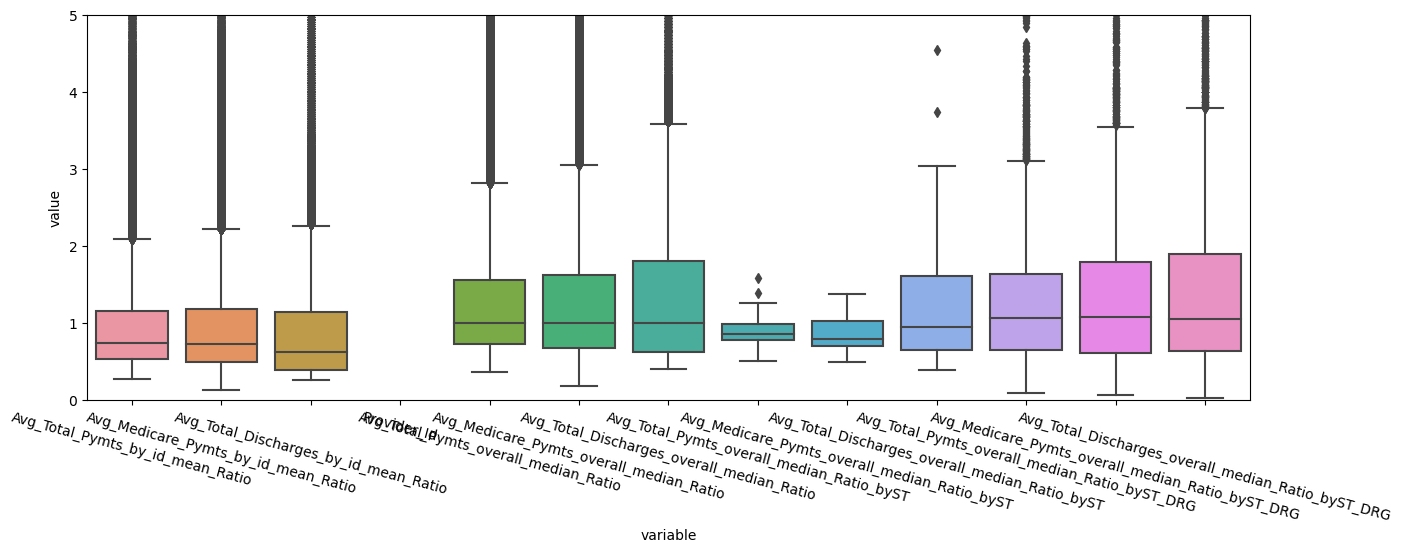

In [248]:
plt.figure(figsize=(15,5)) # Plot a graph with reasonable size.
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,5))
plt.xticks(rotation=-15)

sns.boxplot(x="variable", y="value", data=pd.melt(Features.iloc[:,3::]))

I created 12 featurs in total, from the above features and graphs, we can see that there are so many outliers in these features, these features could help us to find anamolies

### Discussion for ML models employement

#### Unsupervised ML techniques
I think Clustering is a good method for further ML modeling, since clustering method use Euclidean distance to calculate the distance between each plot, it assigns each data point to the nearest seed to form clusters, as this can help us to identify the anomalies

#### Validation method:
We can use Silhouette Score and Elbow method to identify the similarity of clusters, and elbow method help us to identify the ideal clusters numbers

#### Bad feature influence:
Bad feature would lead to misleading insights, therefore affect decision making; bad feature would also lead to bad model performace, increase the probability of false positive and false negative